# Early Detection of Natural Disasters
### Predicting disasters and saving lives with early warnings

Created By:  
Andrés de la Roca  
Jun Woo Lee

The dataset used is available on: https://www.kaggle.com/datasets/brsdincer/all-natural-disasters-19002021-eosdis/data

#### Dataset Summary:
The dataset utilized for this project has information provided from Earth Observing System Data and Information System (EOSDIS), this system is a key component of NASA's Eartch Science Data Systems Program. It is responsible for the acquisition, processing, distribution and archiving of data collected from NASA's Earth Science missions.

This project aims to utilize this data to create a AI model that could predict the ocurrence of future natural disasters, which could help the different regions prepare accordingly as to reduce the negative impact of these types of events.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('DISASTERS/1900_2021_DISASTERS.xlsx - emdat data.csv')

In [80]:
df.head(10)

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
5,1903,6,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,...,NaN,NaN,23.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
6,1903,12,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mount Karthala,Comoros (the),...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
7,1904,3,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,...,NaN,NaN,NaN,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
8,1905,5,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,Canada,...,NaN,NaN,18.0,NaN,NaN,3.479379,NaN,NaN,NaN,NaN
9,1905,3,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,India,...,NaN,NaN,NaN,NaN,25000.0,3.479379,NaN,NaN,NaN,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [82]:
df.describe(include='all')

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
count,16126.000000,16126.000000,1581,16126,16126,16126,13016,1077,3861,16126,...,9.220000e+03,2.430000e+03,1.161700e+04,1.096000e+03,5.245000e+03,15811.000000,7859,4581,3969,7859
unique,NaN,NaN,1086,1,6,15,27,12,1571,228,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3434,3446,6355
top,NaN,NaN,CW-2012-000006,Natural,Hydrological,Flood,Riverine flood,Tornado,Cholera,United States of America (the),...,NaN,NaN,NaN,NaN,NaN,NaN,1,925,13306,Administrative unit not available (Adm1).
freq,NaN,NaN,29,16126,6327,5551,2660,286,491,1087,...,NaN,NaN,NaN,NaN,NaN,NaN,3890,56,9,93
mean,1996.764790,714.784820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.823612e+05,7.329314e+04,7.165088e+05,7.986514e+05,7.247835e+05,63.215103,NaN,NaN,NaN,NaN
std,20.159065,1929.635089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.573913e+06,5.230058e+05,7.718598e+06,3.057638e+06,4.723131e+06,26.734285,NaN,NaN,NaN,NaN
min,1900.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,3.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,3.221647,NaN,NaN,NaN,NaN
25%,1989.000000,93.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.244750e+03,5.725000e+02,6.500000e+02,5.000000e+04,8.300000e+03,45.692897,NaN,NaN,NaN,NaN
50%,2001.000000,270.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+04,3.000000e+03,5.965000e+03,1.725000e+05,6.000000e+04,68.415379,NaN,NaN,NaN,NaN
75%,2011.000000,486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.182300e+04,1.750000e+04,5.825500e+04,5.000000e+05,3.173000e+05,84.252733,NaN,NaN,NaN,NaN


In [83]:
df.isnull().sum()

Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin                   14839
Start Year                  

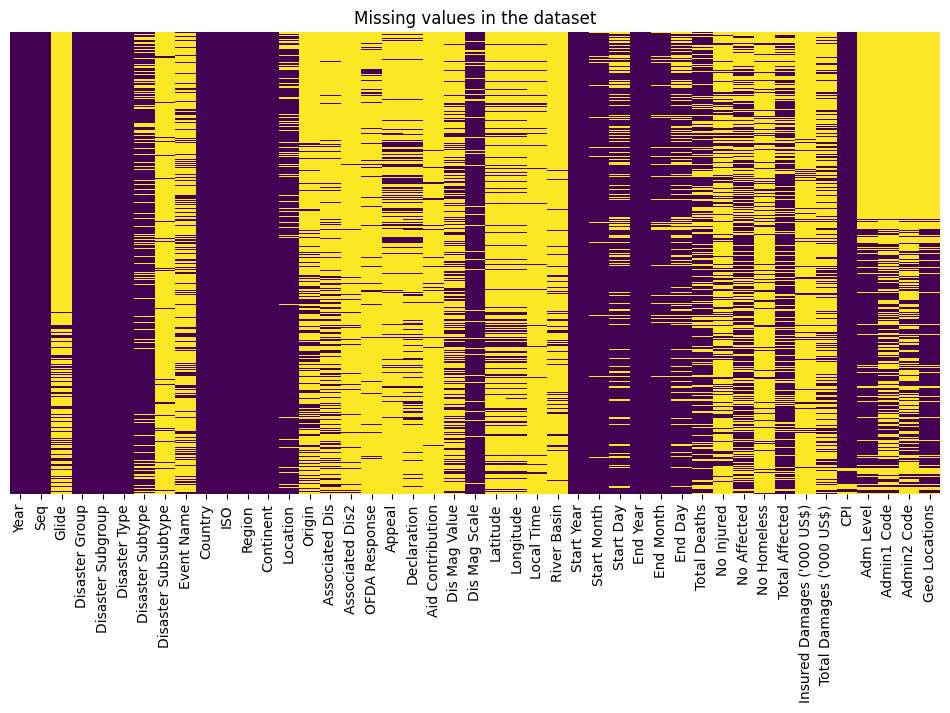

In [84]:
# Visualize missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing values in the dataset')
plt.show()

In [85]:
# Remove non-relevant numerical columns
df.drop(['Aid Contribution', 'Dis Mag Value', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)", "Seq"], axis=1, inplace=True)
# Remove non-relevant categorical columns
df.drop(['Glide', 'Event Name', 'ISO', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Dis Mag Scale', 'River Basin', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', 'Appeal', 'Declaration'], axis=1, inplace=True)

In [86]:
# Handling missing values
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=[np.object]).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

C:\Users\Andrès DLR\AppData\Local\Temp\ipykernel_35376\2355913885.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_cols = df.select_dtypes(include=[np.object]).columns


In [87]:
# Check for duplicates
df.duplicated().sum()

57

C:\Users\Andrès DLR\AppData\Local\Temp\ipykernel_35376\1716684845.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


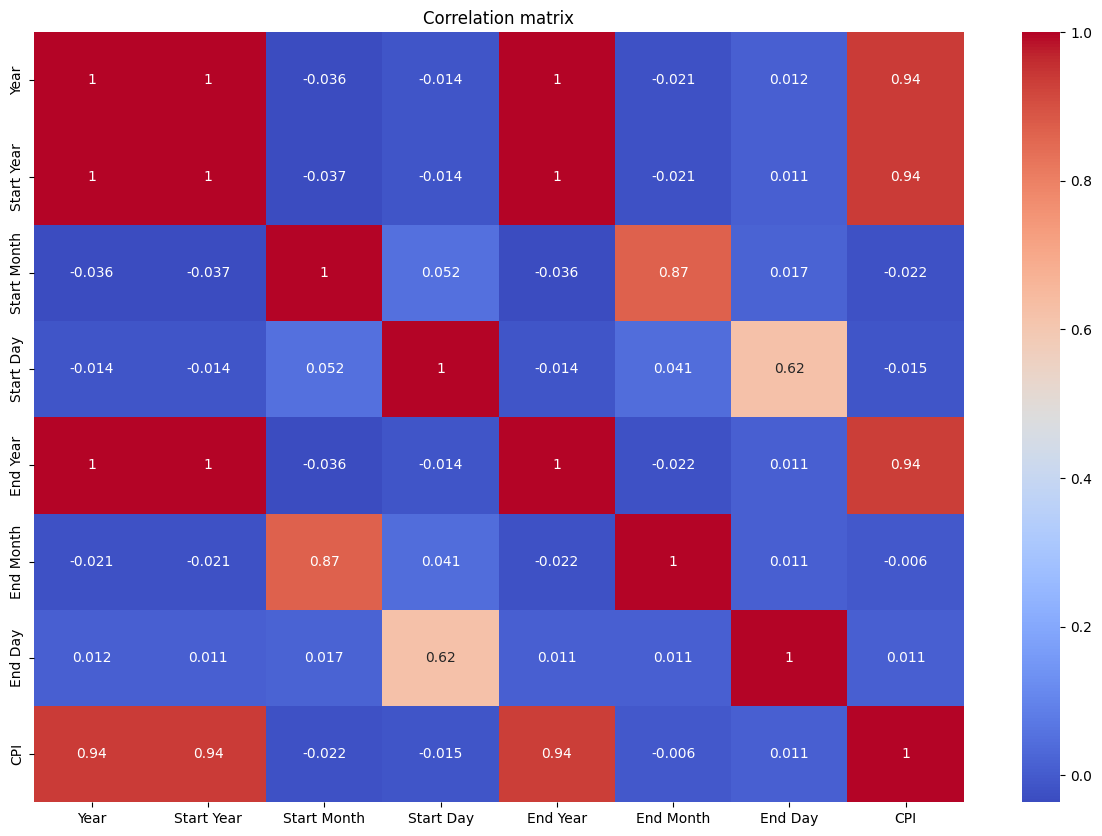

In [88]:
# Display correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

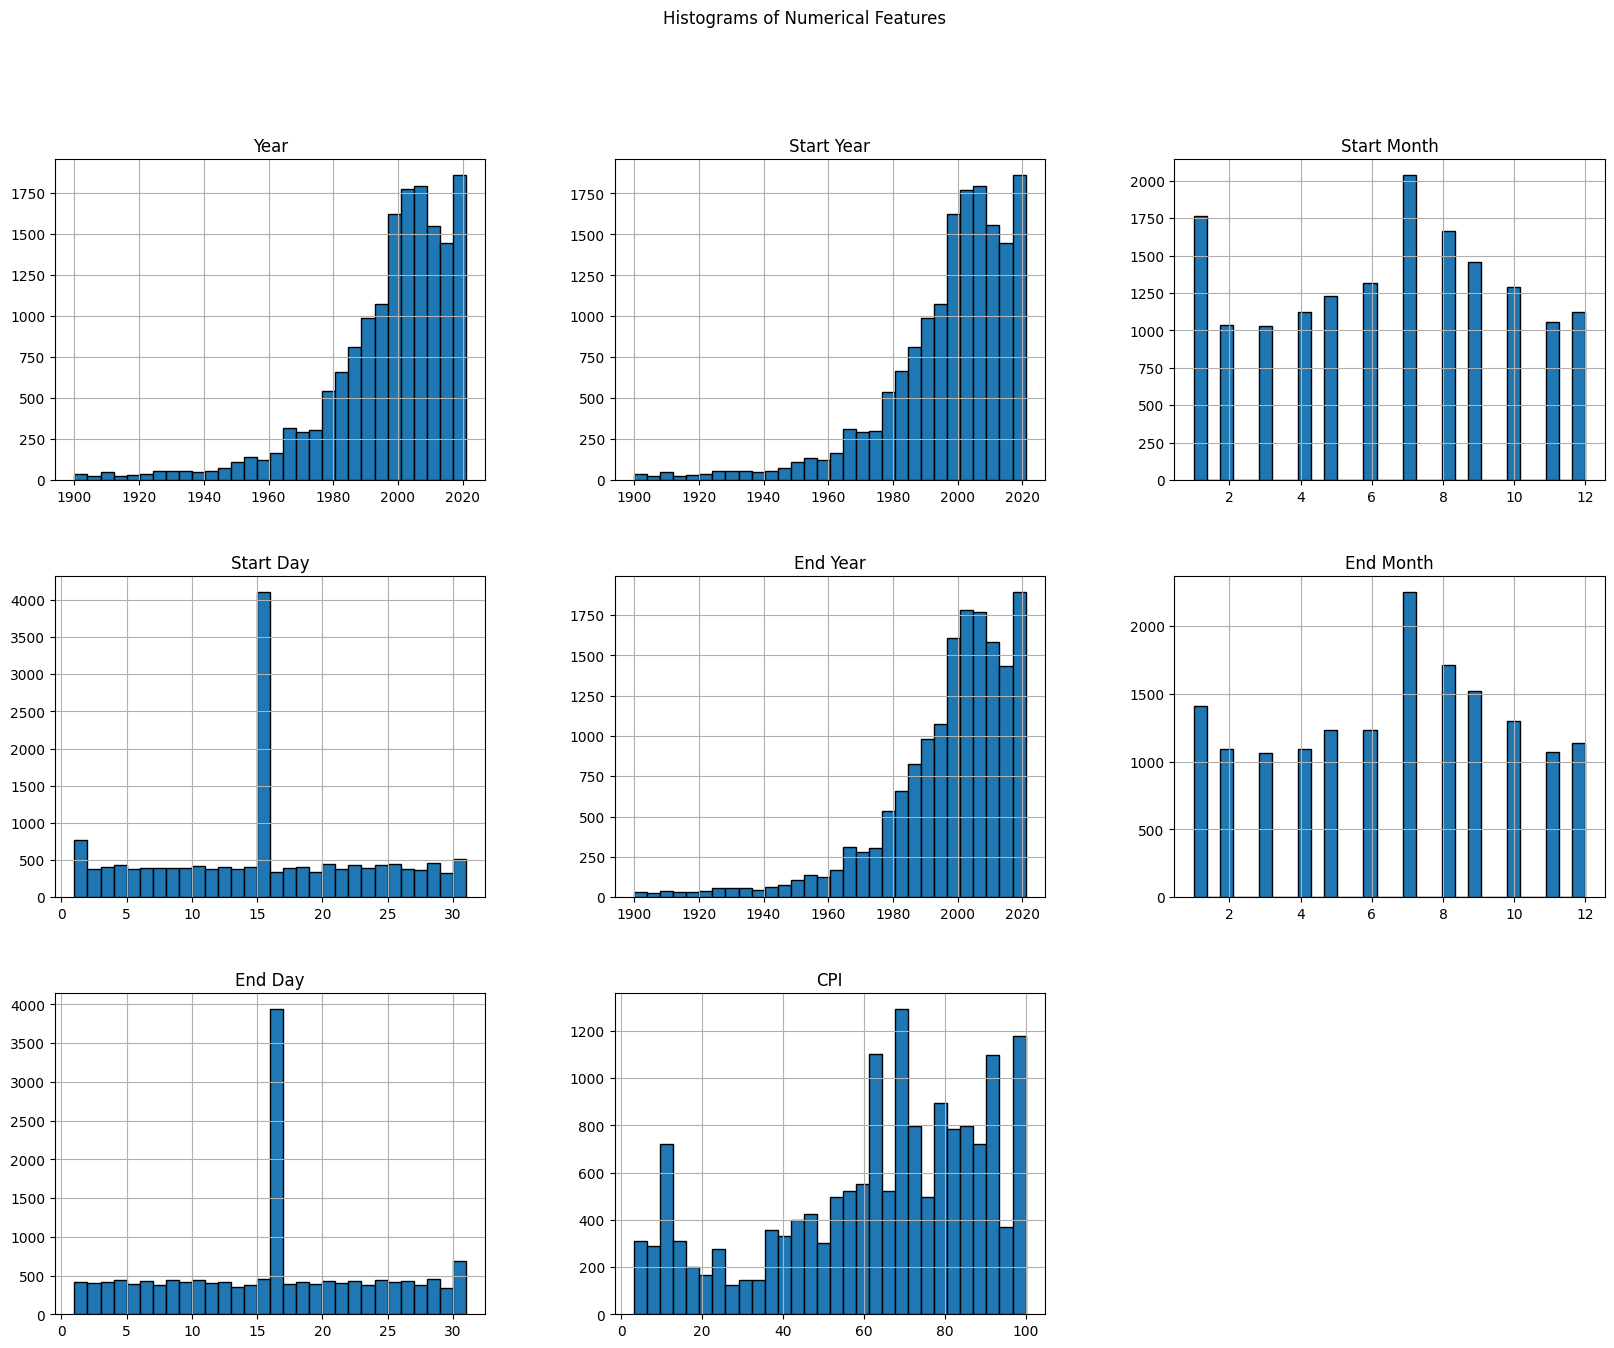

In [89]:
# Univariant analysis
# Histogram for numerical columns
df[num_cols].hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

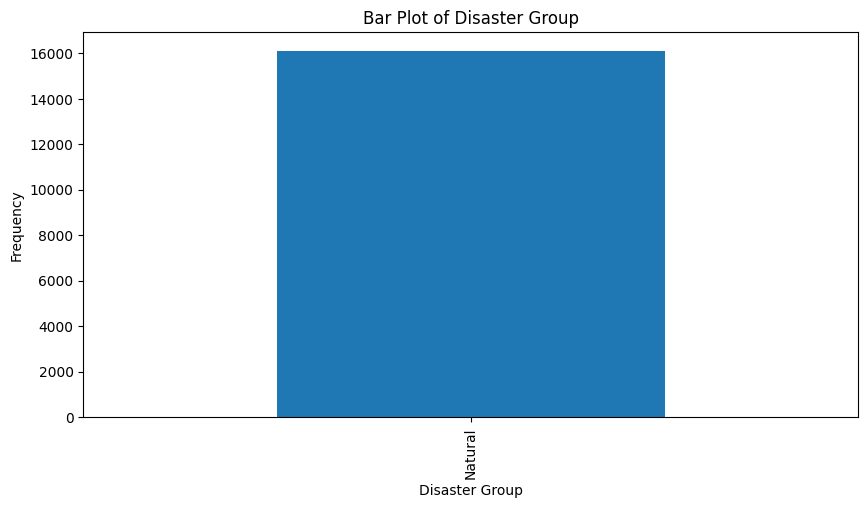

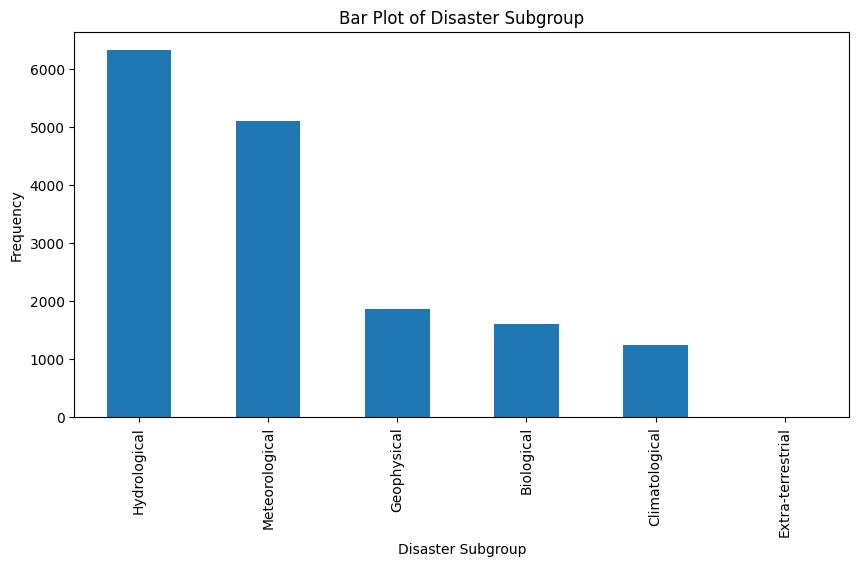

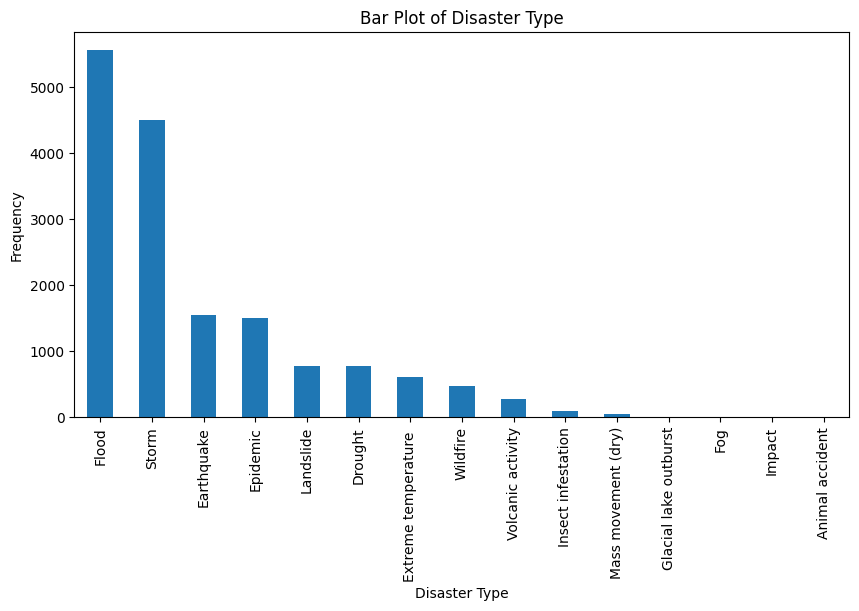

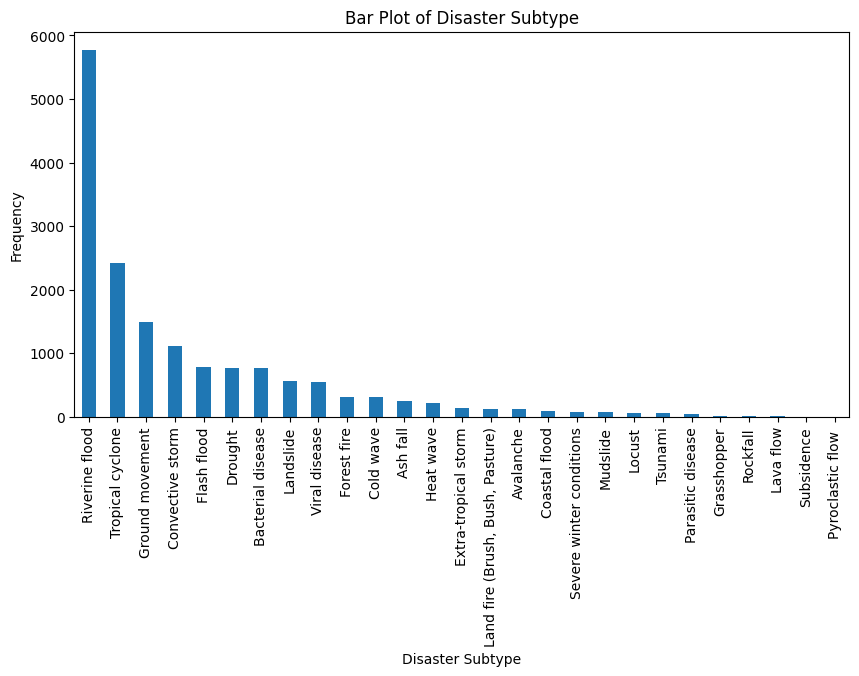

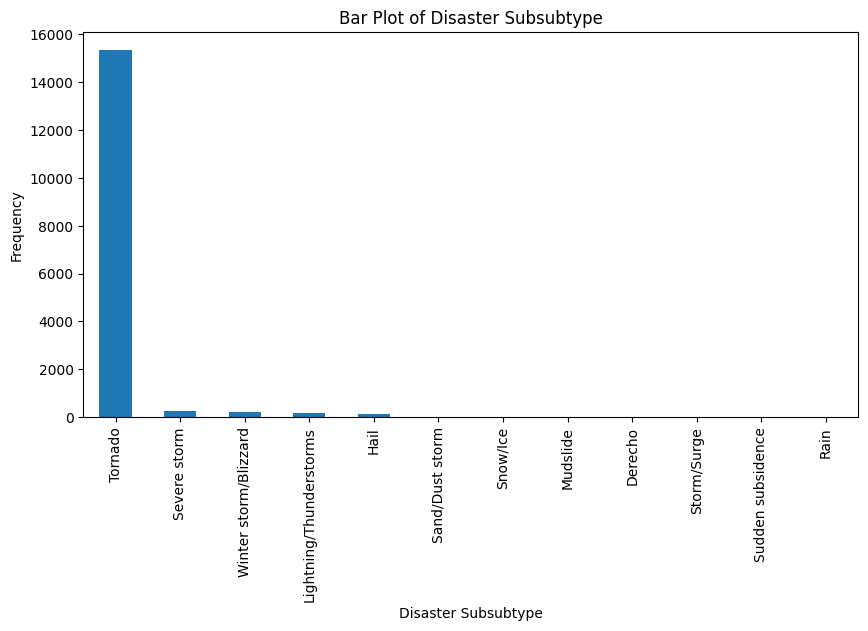

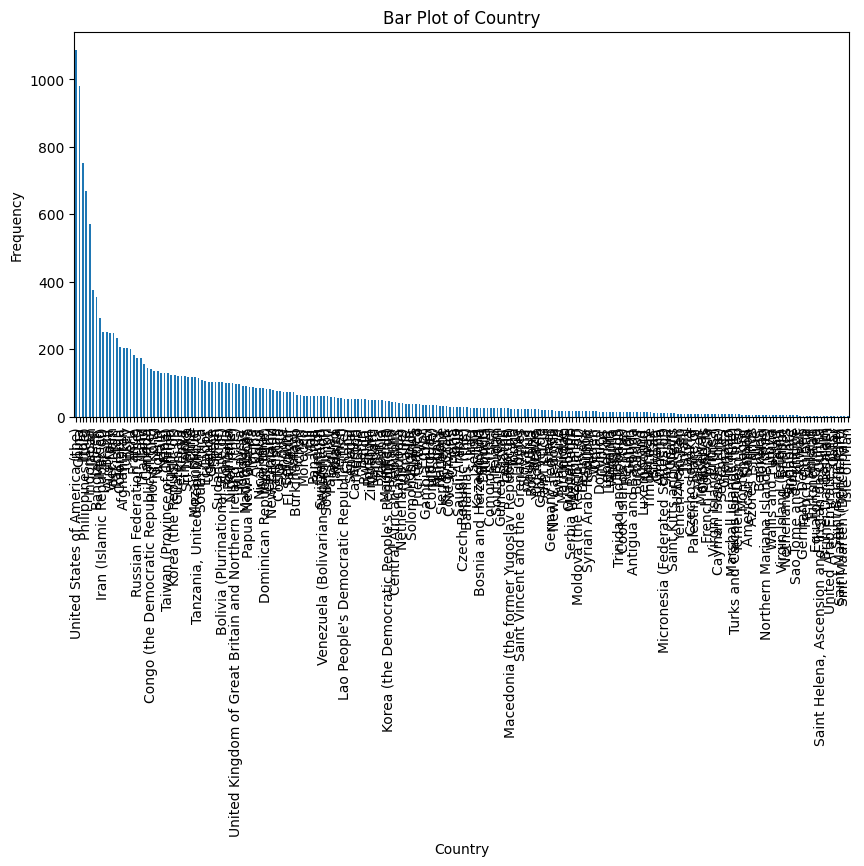

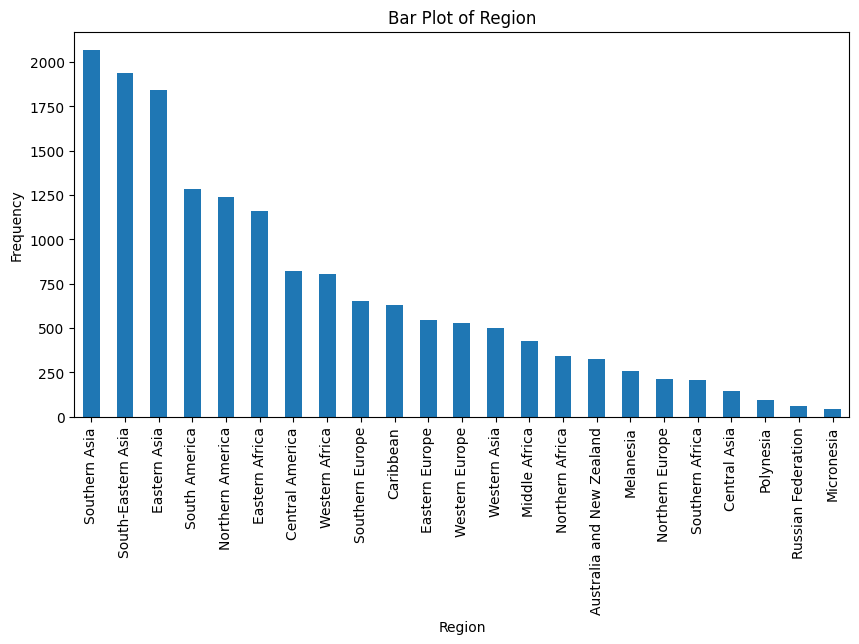

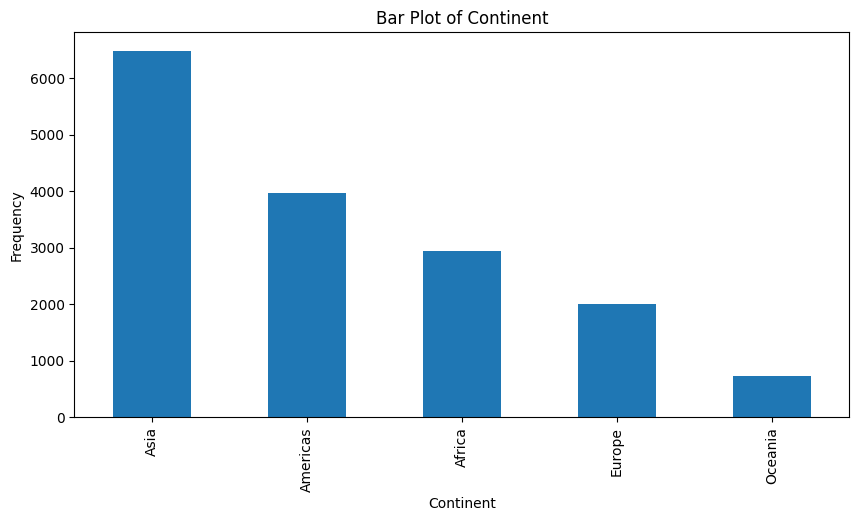

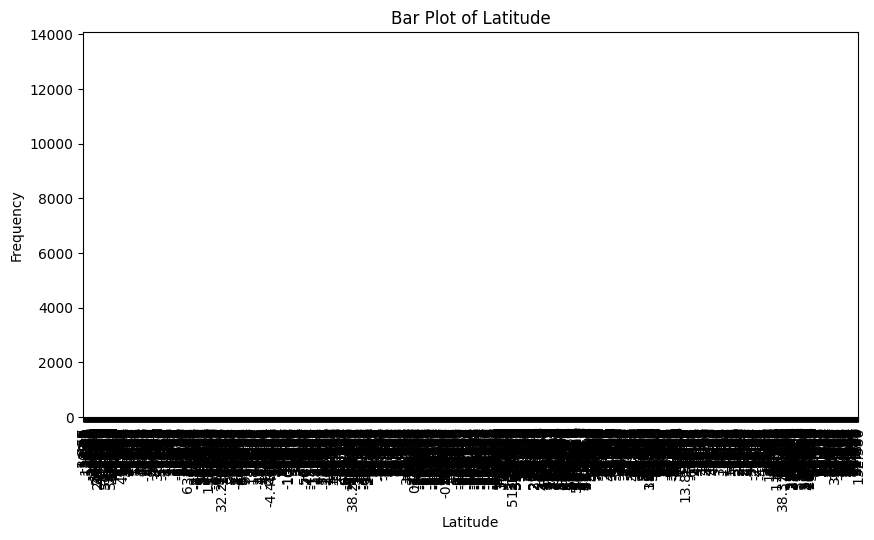

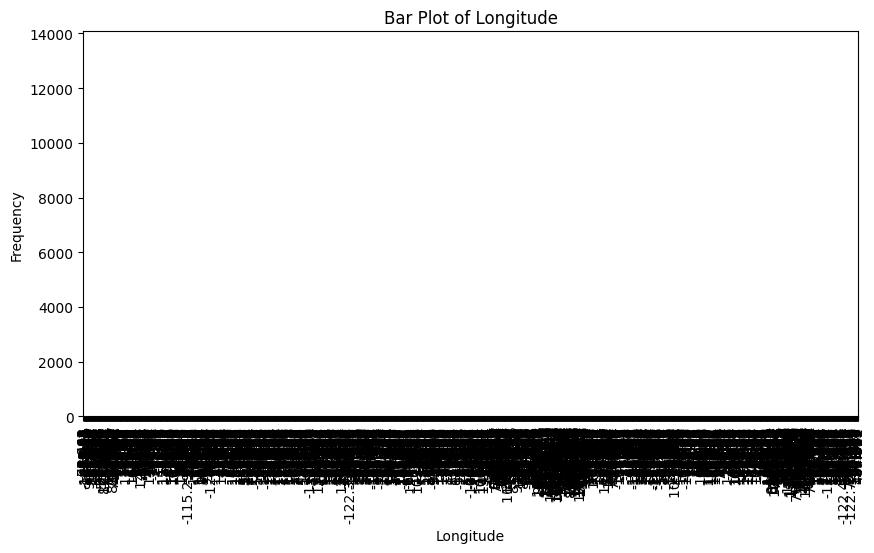

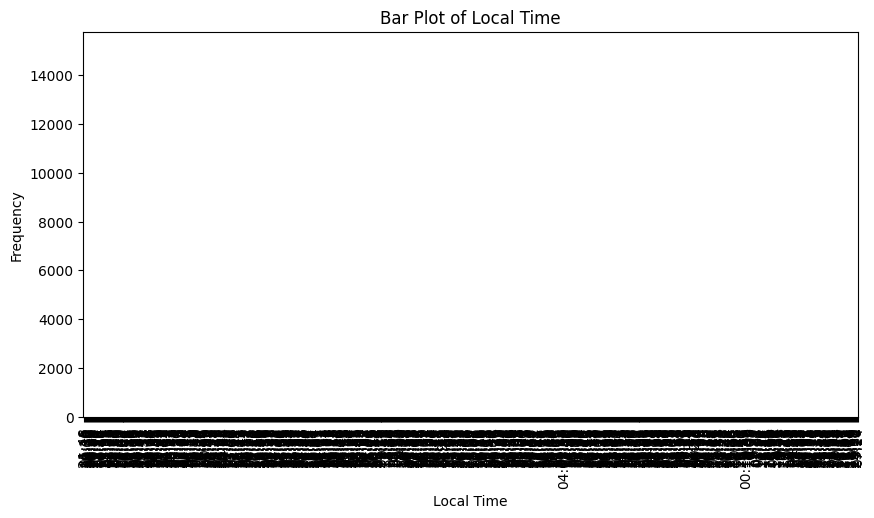

In [90]:
# Bar plot for categorical columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Bar Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 16126 non-null  int64  
 1   Disaster Group       16126 non-null  object 
 2   Disaster Subgroup    16126 non-null  object 
 3   Disaster Type        16126 non-null  object 
 4   Disaster Subtype     16126 non-null  object 
 5   Disaster Subsubtype  16126 non-null  object 
 6   Country              16126 non-null  object 
 7   Region               16126 non-null  object 
 8   Continent            16126 non-null  object 
 9   Latitude             16126 non-null  object 
 10  Longitude            16126 non-null  object 
 11  Local Time           16126 non-null  object 
 12  Start Year           16126 non-null  int64  
 13  Start Month          16126 non-null  float64
 14  Start Day            16126 non-null  float64
 15  End Year             16126 non-null 

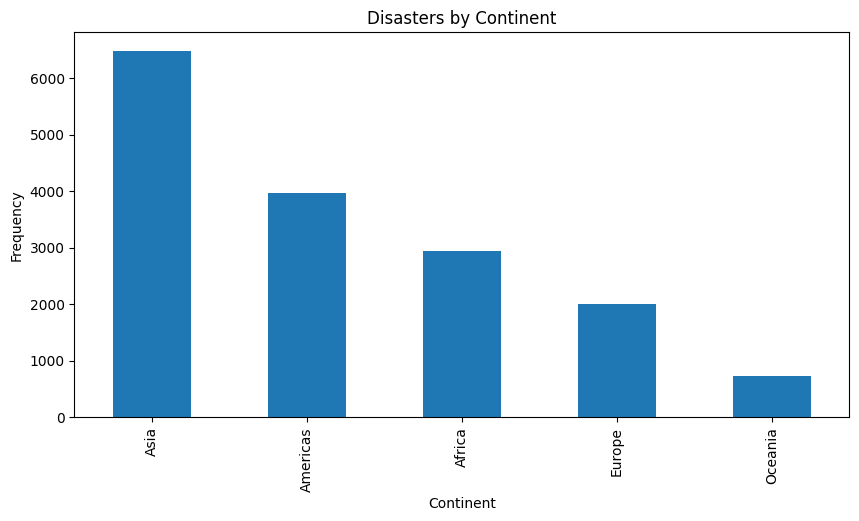

In [93]:
# View Disasters by continent
plt.figure(figsize=(10, 5))
df['Continent'].value_counts().plot(kind='bar')
plt.title("Disasters by Continent")
plt.xlabel("Continent")
plt.ylabel("Frequency")
plt.show()

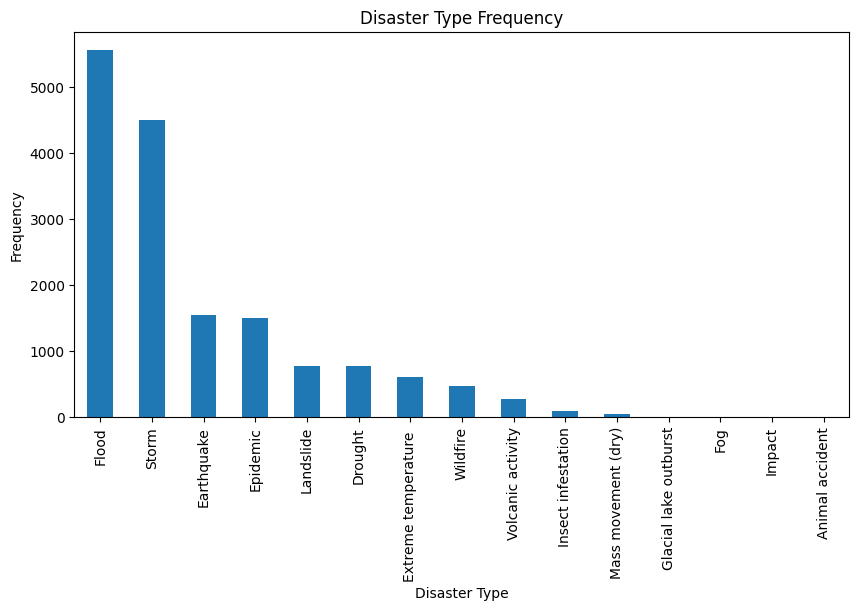

In [97]:
# View Disaster Type frequency
plt.figure(figsize=(10, 5))
df['Disaster Type'].value_counts().plot(kind='bar')
plt.title("Disaster Type Frequency")
plt.xlabel("Disaster Type")
plt.ylabel("Frequency")
plt.show()

### Occurrences of the top 5 most frequent disasters on every continent

  Continent  total
2      Asia   2303
1  Americas   1275
0    Africa   1147
3    Europe    668
4   Oceania    158


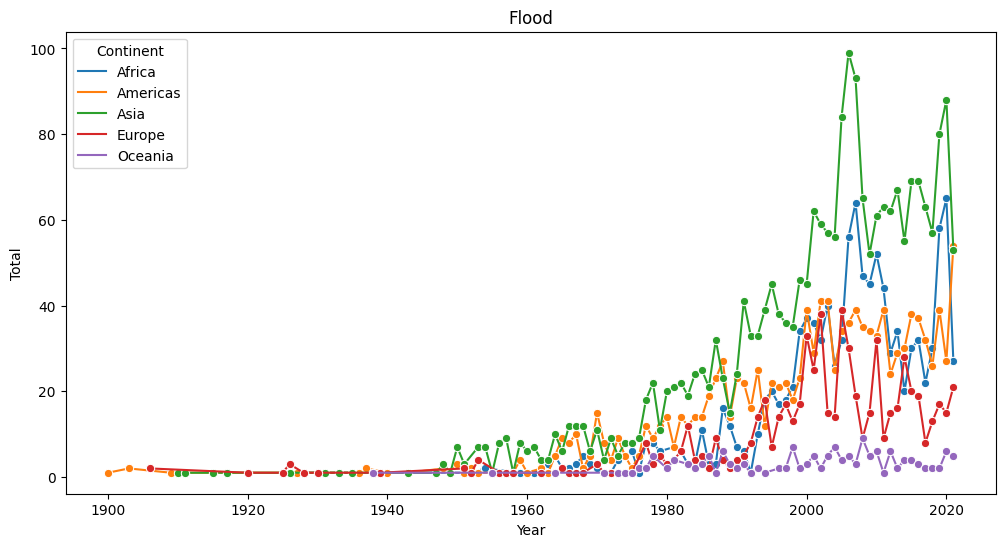

  Continent  total
2      Asia   1884
1  Americas   1442
3    Europe    542
4   Oceania    338
0    Africa    290


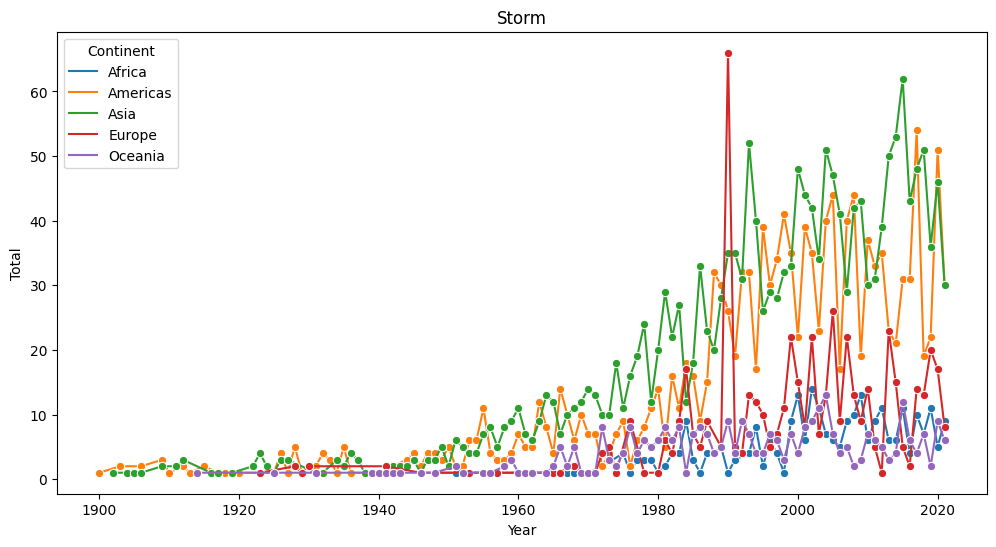

  Continent  total
2      Asia    903
1  Americas    314
3    Europe    197
0    Africa     74
4   Oceania     56


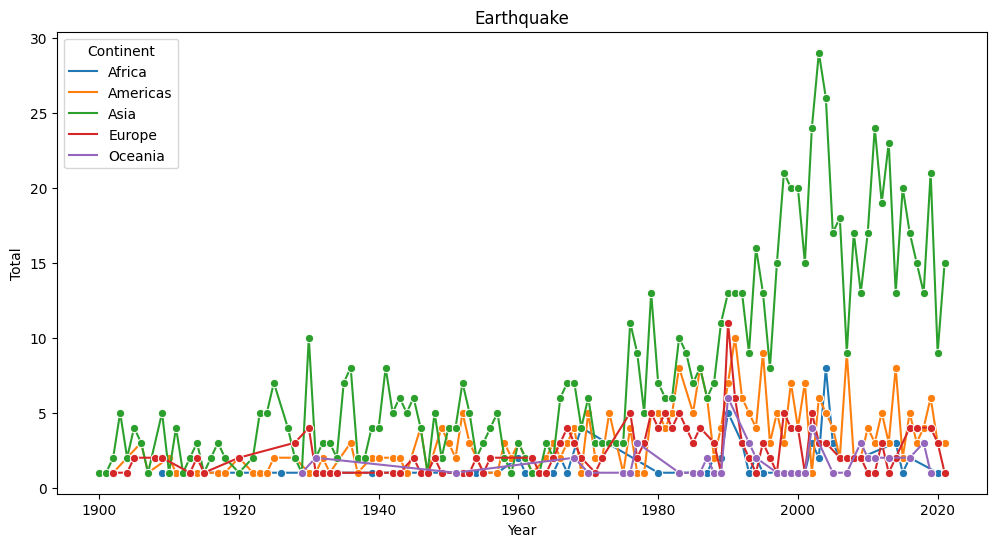

  Continent  total
0    Africa    878
2      Asia    363
1  Americas    183
3    Europe     49
4   Oceania     28


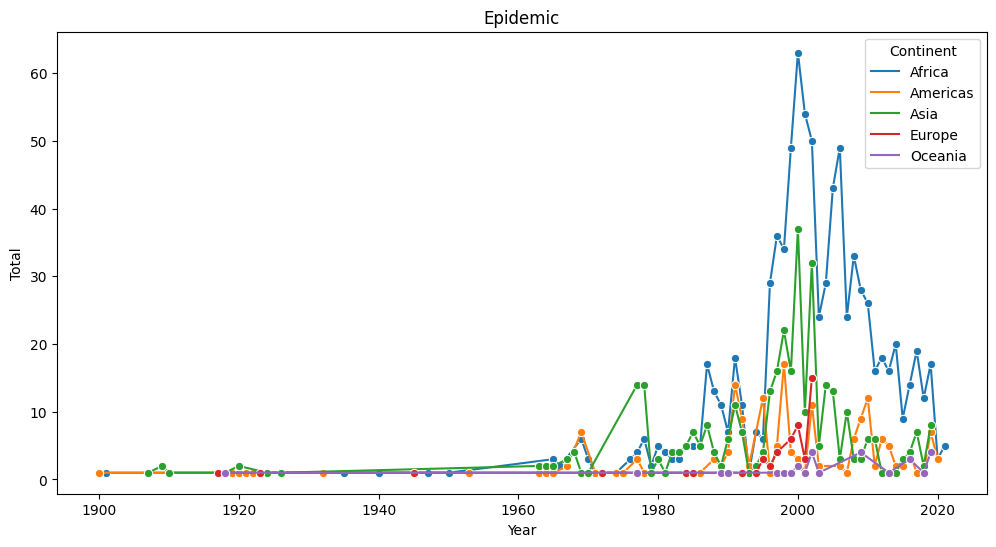

  Continent  total
2      Asia    426
1  Americas    188
3    Europe     82
0    Africa     59
4   Oceania     21


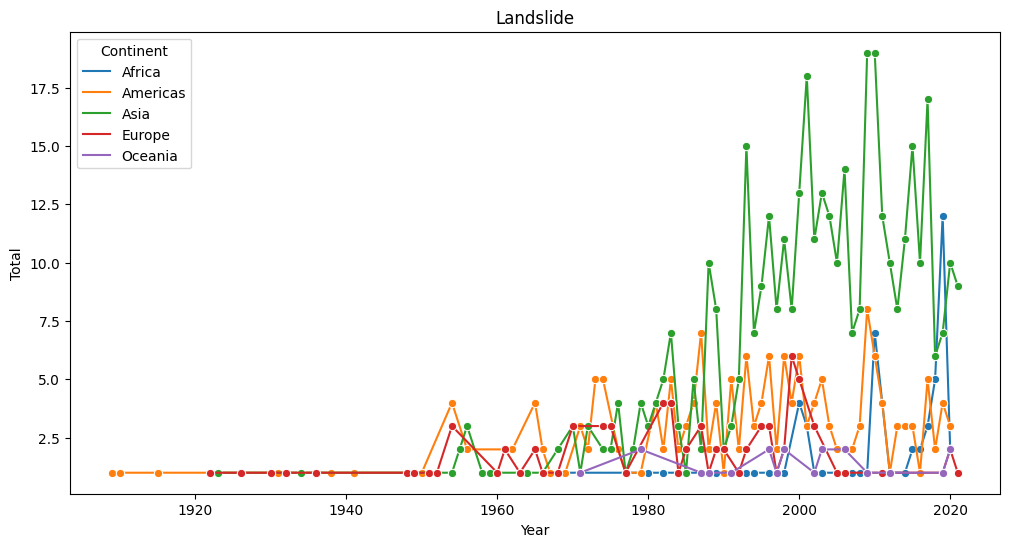

In [105]:
def view_disaster_per_continent(data, disaster_type):
    df = data[data['Disaster Type'] == disaster_type].groupby('Continent').size().reset_index(name='total').sort_values(by='total', ascending=False)
    print(df)

    plot_data = data[data['Disaster Type'] == disaster_type].groupby(['Continent', 'Year']).size().reset_index(name='total')

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=plot_data, x='Year', y='total', hue='Continent', marker='o')
    plt.title(disaster_type)
    plt.xlabel('Year')
    plt.ylabel('Total')
    plt.legend(title='Continent')
    plt.show()

view_disaster_per_continent(df, 'Flood')
view_disaster_per_continent(df, 'Storm')
view_disaster_per_continent(df, 'Earthquake')
view_disaster_per_continent(df, 'Epidemic')
view_disaster_per_continent(df, 'Landslide')

### Occurrences of the top 5 most frequent disasters on countries

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                            Country  total
75                            India    311
34                            China    310
76                        Indonesia    242
178  United States of America (the)    200
131               Philippines (the)    155
..                              ...    ...
53                          Finland      1
43                   Czechoslovakia      1
26                       Cabo Verde      1
65                       Guadeloupe      1
173                    Turkmenistan      1

[190 rows x 2 columns]


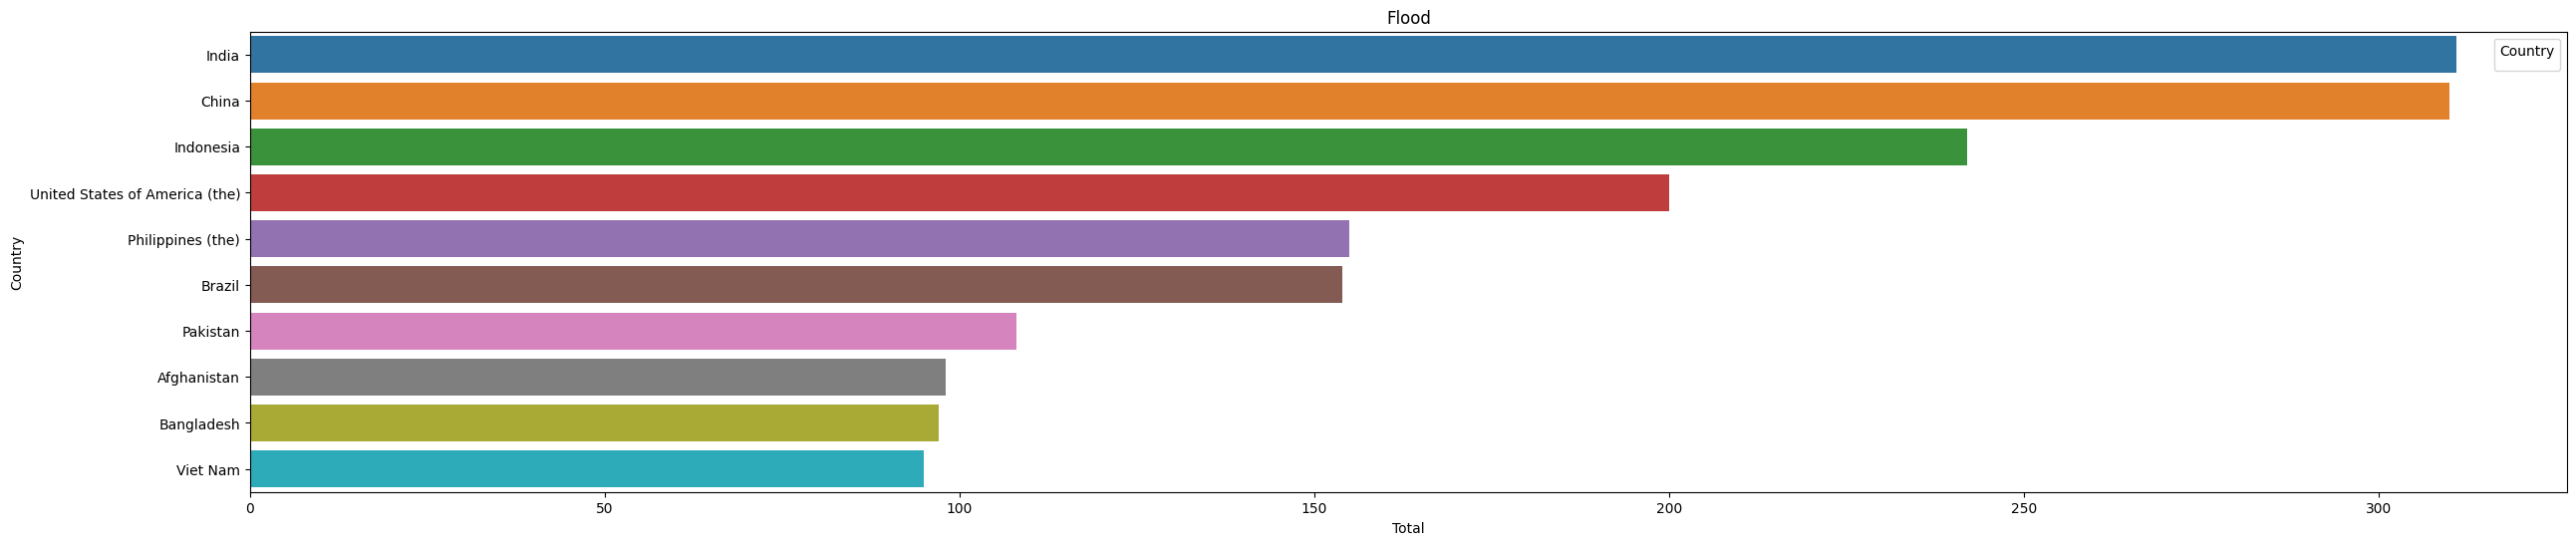

                                         Country  total
184               United States of America (the)    684
135                            Philippines (the)    375
34                                         China    318
75                                         India    206
83                                         Japan    187
..                                           ...    ...
17                                         Benin      1
99   Macedonia (the former Yugoslav Republic of)      1
155                    Sint Maarten (Dutch part)      1
174                                         Togo      1
147                   Saint Martin (French Part)      1

[194 rows x 2 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


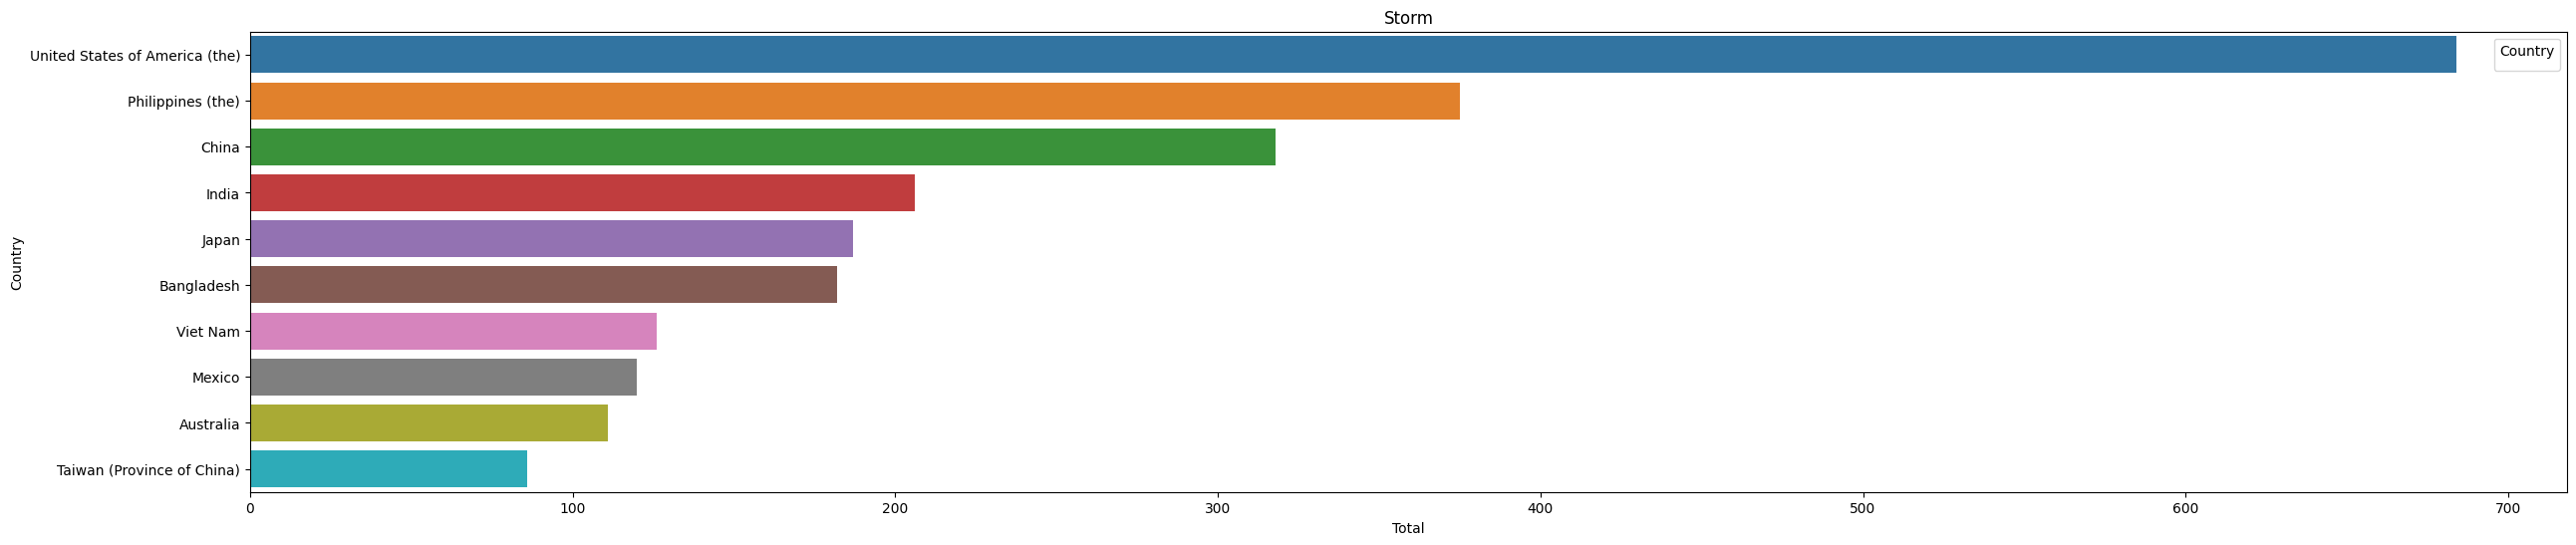

                        Country  total
20                        China    199
50                    Indonesia    135
51   Iran (Islamic Republic of)    131
110                      Turkey    110
56                        Japan     69
..                          ...    ...
83                       Poland      1
89                  Saint Lucia      1
90                        Samoa      1
91                       Serbia      1
75            Netherlands (the)      1

[122 rows x 2 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


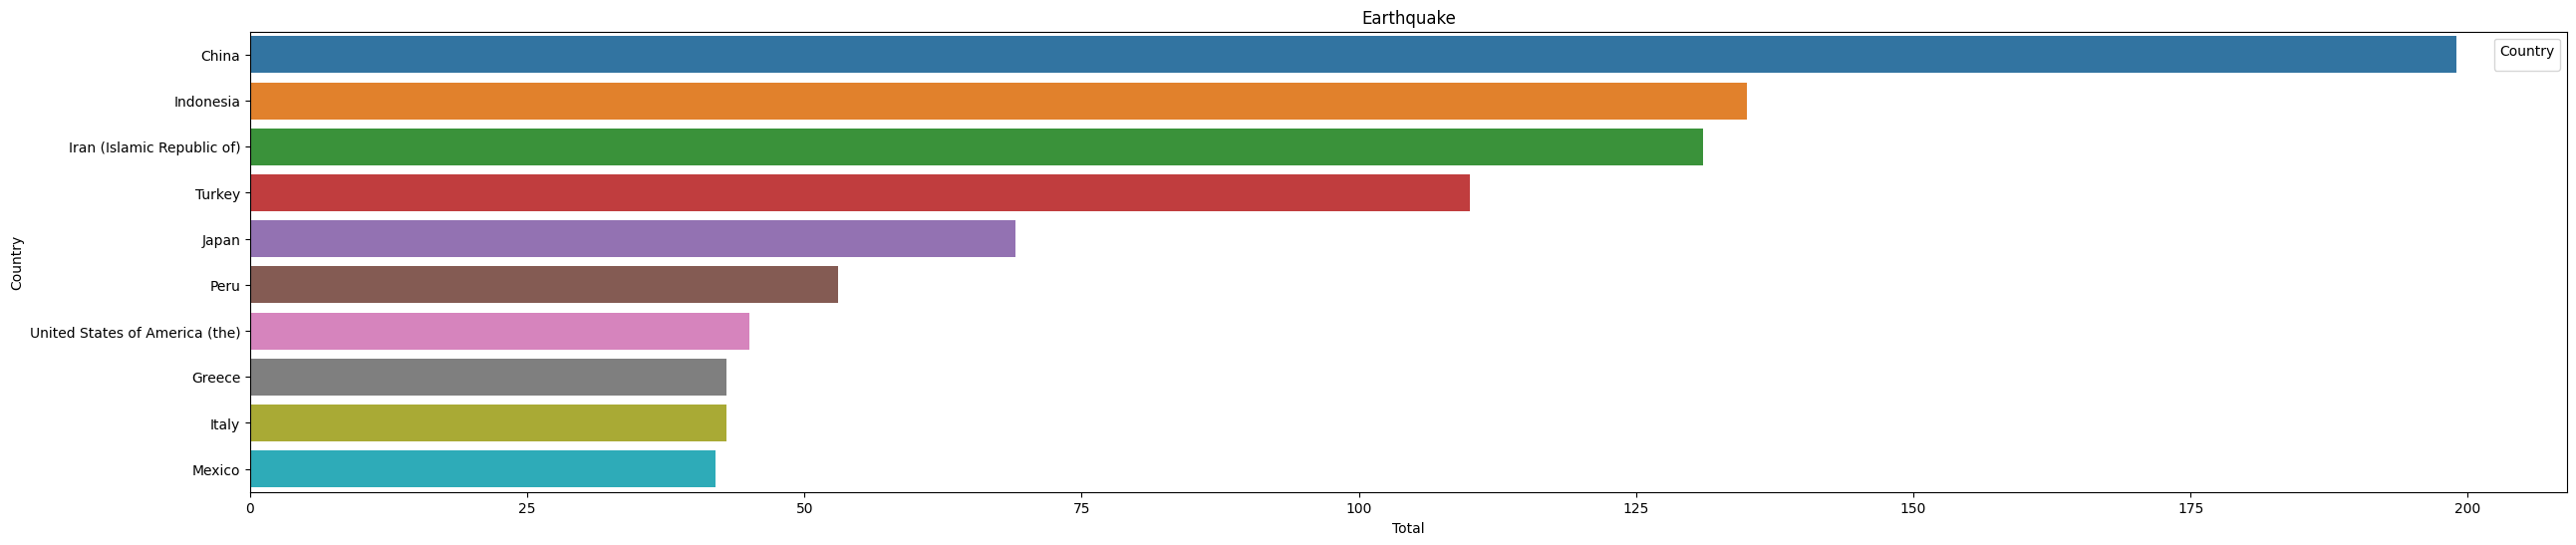

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                    Country  total
29   Congo (the Democratic Republic of the)     78
56                                    India     70
102                                 Nigeria     67
101                             Niger (the)     45
146                                  Uganda     41
..                                      ...    ...
84                   Marshall Islands (the)      1
43                                     Fiji      1
117        Saint Vincent and the Grenadines      1
118                                   Samoa      1
90                Moldova (the Republic of)      1

[158 rows x 2 columns]


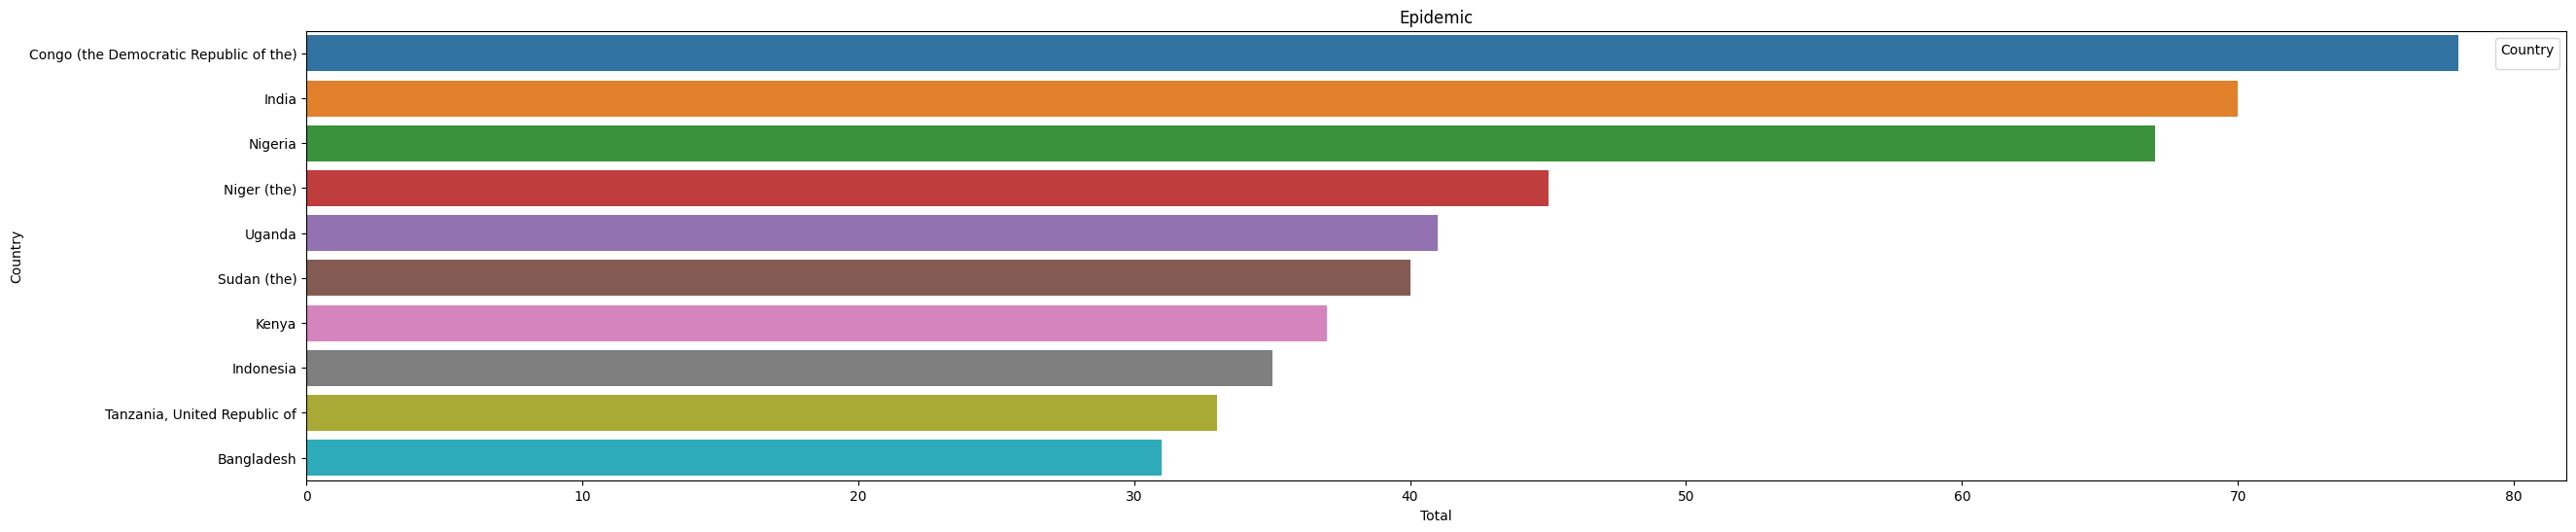

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


      Country  total
20      China     74
41  Indonesia     64
40      India     53
21   Colombia     44
65       Peru     34
..        ...    ...
18       Chad      1
68    Romania      1
14   Bulgaria      1
71    Réunion      1
95     Zambia      1

[96 rows x 2 columns]


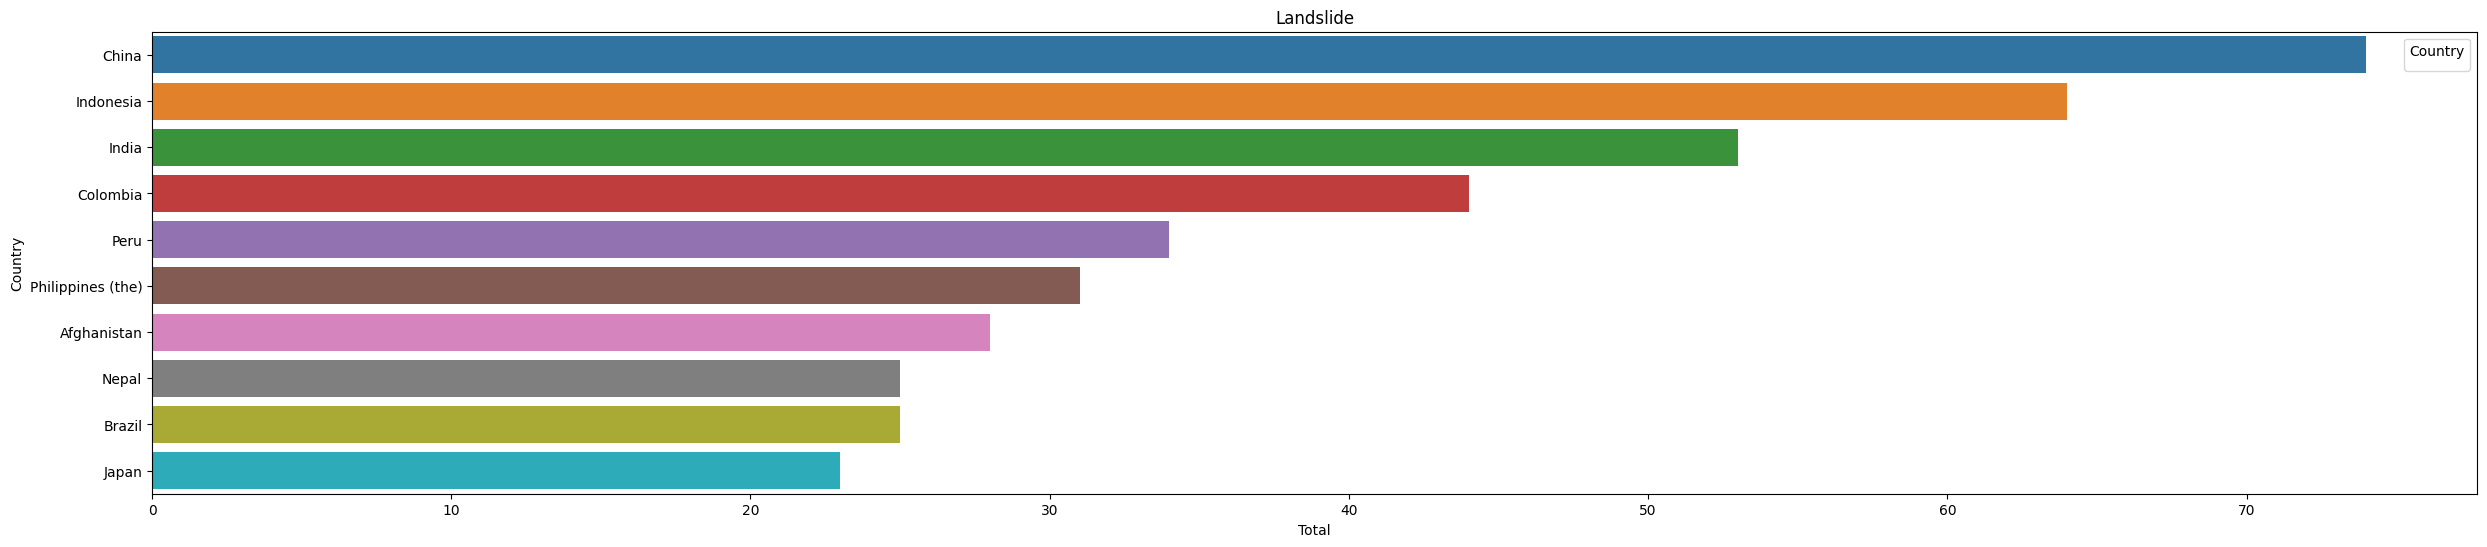

In [116]:
def view_disaster_per_country(data, disaster):
    # Limit the number of countries to display to 10
    df = data[data['Disaster Type'] == disaster].groupby('Country').size().reset_index(name='total').sort_values(by='total', ascending=False)
    print(df)

    plot_data = data[data['Disaster Type'] == disaster].groupby(['Country']).size().reset_index(name='total').sort_values(by='total', ascending=False).head(10)

    # Create the plot
    plt.figure(figsize=(30, 6))
    sns.barplot(data=plot_data, x='total', y ='Country')
    plt.title(disaster)
    plt.ylabel('Country')
    plt.xlabel('Total')
    plt.legend(title='Country')
    plt.show()

view_disaster_per_country(df, 'Flood')
view_disaster_per_country(df, 'Storm')
view_disaster_per_country(df, 'Earthquake')
view_disaster_per_country(df, 'Epidemic')
view_disaster_per_country(df, 'Landslide')